## AND, OR, XOR, NAND, NOR, XNOR using creditcard.csv

### Load Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

### Read Data

In [5]:
df = pd.read_csv("creditcard.csv")

### Glimse of data

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Credit card Fraud- data unbalance

/home/abhigyan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')]

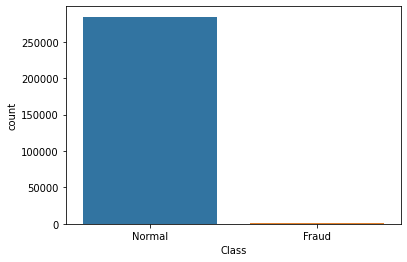

In [9]:
graph = sns.countplot(df["Class"],data=df)
graph.set_xticklabels(["Normal","Fraud"])

### check for missing values

<AxesSubplot:>

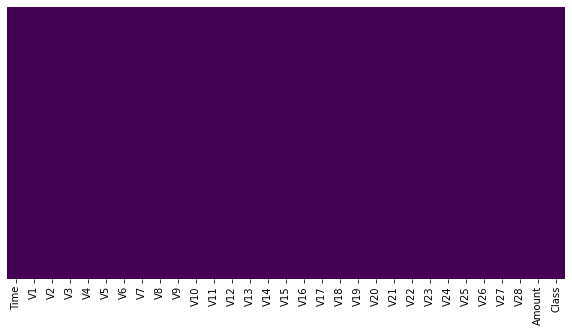

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [11]:
target = df["Class"]

In [12]:
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [13]:
df= df.drop(["Class"],axis=1)

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## splitting data in train and test sets

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=42)

In [16]:
x_test.shape

(85443, 30)

In [17]:
x_train.shape

(199364, 30)

In [18]:
y_test.value_counts()

0    85307
1      136
Name: Class, dtype: int64

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score

In [20]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=42, shuffle=True) 

results = cross_validate(estimator=rf,
                                          X=df,
                                          y=target,
                                          cv=kfold,
                                          scoring=scoring)

In [21]:
results

{'fit_time': array([210.55287957, 222.60826087, 232.95430613, 227.45555997,
        234.14511728, 227.43631172, 236.9434936 , 229.58857059,
        224.68666029, 225.33002973]),
 'score_time': array([0.2777822 , 0.27965379, 0.3067224 , 0.29230332, 0.2833724 ,
        0.30316091, 0.28973007, 0.29554987, 0.29273987, 0.38345408]),
 'test_accuracy': array([0.99957867, 0.99957867, 0.99971911, 0.999368  , 0.99950844,
        0.99950844, 0.99961378, 0.99947331, 0.99947331, 0.99968399]),
 'test_precision': array([0.97222222, 0.97619048, 0.89473684, 0.91111111, 1.        ,
        0.93333333, 0.97435897, 0.95238095, 0.87755102, 1.        ]),
 'test_recall': array([0.76086957, 0.78846154, 0.89473684, 0.74545455, 0.74545455,
        0.7       , 0.79166667, 0.75471698, 0.82692308, 0.83018868]),
 'test_f1_score': array([0.85365854, 0.87234043, 0.89473684, 0.82      , 0.85416667,
        0.8       , 0.87356322, 0.84210526, 0.85148515, 0.90721649])}

In [22]:
precision = np.mean(results['test_precision'])
precision
np.mean(results['test_recall'])

0.7838472440660386

In [23]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred_rf = rf.predict(x_test)

## AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42,algorithm='SAMME.R',
                         learning_rate=0.8,)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [26]:
y_pred_ada = ada.predict(x_test)

## Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [29]:
y_pred_gb = gb.predict(x_test)

## XG Boost

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [31]:
xgb.fit(x_train,y_train)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:55:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred_xgb = xgb.predict(x_test)

## Not Logic

In [33]:
def negation(y):
    x = np.where(y == 0, 1, 0)
    return x

In [34]:
arr1 = np.array([1,0,1,1,0,1,0])
arr2 = negation(arr1)
arr2

array([0, 1, 0, 0, 1, 0, 1])

## Adaboost and GB (AND)

In [35]:
y_pred = y_pred_ada & y_pred_gb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9985487400957364
[[85307     0]
 [  124    12]]
              precision    recall  f1-score   support

           0     0.9985    1.0000    0.9993     85307
           1     1.0000    0.0882    0.1622       136

    accuracy                         0.9985     85443
   macro avg     0.9993    0.5441    0.5807     85443
weighted avg     0.9986    0.9985    0.9979     85443



## Adaboost and Gradient Boost (OR)

In [36]:
y_pred = y_pred_ada | y_pred_gb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9994382219725431
[[85288    19]
 [   29   107]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     85307
           1     0.8492    0.7868    0.8168       136

    accuracy                         0.9994     85443
   macro avg     0.9244    0.8933    0.9083     85443
weighted avg     0.9994    0.9994    0.9994     85443



## Adaboost and GB (XOR) 

In [37]:
y_pred = y_pred_ada ^ y_pred_gb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9992977774656788
[[85288    19]
 [   41    95]]
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     85307
           1     0.8333    0.6985    0.7600       136

    accuracy                         0.9993     85443
   macro avg     0.9164    0.8492    0.8798     85443
weighted avg     0.9993    0.9993    0.9993     85443



## Adaboost and GB (NAND)

In [38]:
y_pred = negation(y_pred_ada & y_pred_gb)
y_pred.shape
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.0014512599042636612
[[    0 85307]
 [   12   124]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     85307
           1     0.0015    0.9118    0.0029       136

    accuracy                         0.0015     85443
   macro avg     0.0007    0.4559    0.0014     85443
weighted avg     0.0000    0.0015    0.0000     85443



## Ada and GB (NOR)

In [39]:
y_pred = negation(y_pred_ada | y_pred_gb)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.0005617780274569011
[[   19 85288]
 [  107    29]]
              precision    recall  f1-score   support

           0     0.1508    0.0002    0.0004     85307
           1     0.0003    0.2132    0.0007       136

    accuracy                         0.0006     85443
   macro avg     0.0756    0.1067    0.0006     85443
weighted avg     0.1506    0.0006    0.0004     85443



## Ada and GB (XNOR)

In [40]:
y_pred = negation((y_pred_ada ^ y_pred_gb))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.0007022225343211264
[[   19 85288]
 [   95    41]]
              precision    recall  f1-score   support

           0     0.1667    0.0002    0.0004     85307
           1     0.0005    0.3015    0.0010       136

    accuracy                         0.0007     85443
   macro avg     0.0836    0.1508    0.0007     85443
weighted avg     0.1664    0.0007    0.0004     85443



## Under Sampling

In [41]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [42]:
us = NearMiss(0.8)
x_train_us,y_train_us = us.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_us)))

/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 445, 1: 356})


## Rf with US

In [43]:
rf.fit(x_train_us,y_train_us)
y_pred_rf_us = rf.predict(x_test)

## Ada with US

In [44]:
ada.fit(x_train_us,y_train_us)
y_pred_ada_us = ada.predict(x_test)

## GB with US

In [45]:
gb.fit(x_train_us,y_train_us)
y_pred_gb_us = gb.predict(x_test)

## XGB with US

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_us,y_train_us)
y_pred_xgb_us = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:56:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## RF and Ada US (AND)

In [47]:
y_pred = y_pred_ada_us & y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7077817960511686
[[60347 24960]
 [    8   128]]
              precision    recall  f1-score   support

           0     0.9999    0.7074    0.8286     85307
           1     0.0051    0.9412    0.0101       136

    accuracy                         0.7078     85443
   macro avg     0.5025    0.8243    0.4194     85443
weighted avg     0.9983    0.7078    0.8273     85443



## RF and Ada US (OR)

In [48]:
y_pred = y_pred_ada_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5118383015577637
[[43601 41706]
 [    4   132]]
              precision    recall  f1-score   support

           0     0.9999    0.5111    0.6764     85307
           1     0.0032    0.9706    0.0063       136

    accuracy                         0.5118     85443
   macro avg     0.5015    0.7408    0.3414     85443
weighted avg     0.9983    0.5118    0.6754     85443



## RF and Ada US (XOR)

In [49]:
y_pred = y_pred_ada_us ^ y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8024648010954671
[[68561 16746]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9981    0.8037    0.8904     85307
           1     0.0002    0.0294    0.0005       136

    accuracy                         0.8025     85443
   macro avg     0.4992    0.4166    0.4454     85443
weighted avg     0.9965    0.8025    0.8890     85443



## RF and Ada US (NAND)

In [50]:
y_pred = negation(y_pred_ada_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.48816169844223634
[[41706 43601]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9968    0.4889    0.6560     85307
           1     0.0001    0.0294    0.0002       136

    accuracy                         0.4882     85443
   macro avg     0.4985    0.2592    0.3281     85443
weighted avg     0.9953    0.4882    0.6550     85443



## RF and Ada US (NOR)

In [51]:
y_pred = negation(y_pred_ada_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.48816169844223634
[[41706 43601]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9968    0.4889    0.6560     85307
           1     0.0001    0.0294    0.0002       136

    accuracy                         0.4882     85443
   macro avg     0.4985    0.2592    0.3281     85443
weighted avg     0.9953    0.4882    0.6550     85443



## RF and Ada US (XNOR)

In [52]:
y_pred = negation(y_pred_ada_us ^ y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.19753519890453283
[[16746 68561]
 [    4   132]]
              precision    recall  f1-score   support

           0     0.9998    0.1963    0.3282     85307
           1     0.0019    0.9706    0.0038       136

    accuracy                         0.1975     85443
   macro avg     0.5008    0.5834    0.1660     85443
weighted avg     0.9982    0.1975    0.3277     85443



## RF and GB Hybrid US (AND)

In [53]:
y_pred = y_pred_gb_us & y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7121472794728649
[[60719 24588]
 [    7   129]]
              precision    recall  f1-score   support

           0     0.9999    0.7118    0.8316     85307
           1     0.0052    0.9485    0.0104       136

    accuracy                         0.7121     85443
   macro avg     0.5026    0.8301    0.4210     85443
weighted avg     0.9983    0.7121    0.8303     85443



## RF and GB Hybrid US (OR)

In [54]:
y_pred = y_pred_gb_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5511276523530306
[[46958 38349]
 [    4   132]]
              precision    recall  f1-score   support

           0     0.9999    0.5505    0.7100     85307
           1     0.0034    0.9706    0.0068       136

    accuracy                         0.5511     85443
   macro avg     0.5017    0.7605    0.3584     85443
weighted avg     0.9983    0.5511    0.7089     85443



## RF and GB Hybrid US (XOR)

In [55]:
y_pred = y_pred_gb_us ^ y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8373886684690378
[[71546 13761]
 [  133     3]]
              precision    recall  f1-score   support

           0     0.9981    0.8387    0.9115     85307
           1     0.0002    0.0221    0.0004       136

    accuracy                         0.8374     85443
   macro avg     0.4992    0.4304    0.4560     85443
weighted avg     0.9966    0.8374    0.9100     85443



## RF and GB Hybrid US (NAND)

In [56]:
y_pred = negation(y_pred_gb_us & y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.28785272052713506
[[24588 60719]
 [  129     7]]
              precision    recall  f1-score   support

           0     0.9948    0.2882    0.4470     85307
           1     0.0001    0.0515    0.0002       136

    accuracy                         0.2879     85443
   macro avg     0.4974    0.1699    0.2236     85443
weighted avg     0.9932    0.2879    0.4462     85443



## RF and GB Hybrid US (NOR)

In [57]:
y_pred = negation(y_pred_gb_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.4488723476469693
[[38349 46958]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9966    0.4495    0.6196     85307
           1     0.0001    0.0294    0.0002       136

    accuracy                         0.4489     85443
   macro avg     0.4983    0.2395    0.3099     85443
weighted avg     0.9950    0.4489    0.6186     85443



## RF and GB Hybrid US (XNOR)

In [58]:
y_pred = negation(y_pred_gb_us ^ y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.16261133153096216
[[13761 71546]
 [    3   133]]
              precision    recall  f1-score   support

           0     0.9998    0.1613    0.2778     85307
           1     0.0019    0.9779    0.0037       136

    accuracy                         0.1626     85443
   macro avg     0.5008    0.5696    0.1408     85443
weighted avg     0.9982    0.1626    0.2774     85443



## RF and XGB Hybrid US (AND)

In [59]:
y_pred = y_pred_xgb_us & y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7131420947298199
[[60804 24503]
 [    7   129]]
              precision    recall  f1-score   support

           0     0.9999    0.7128    0.8323     85307
           1     0.0052    0.9485    0.0104       136

    accuracy                         0.7131     85443
   macro avg     0.5026    0.8306    0.4213     85443
weighted avg     0.9983    0.7131    0.8310     85443



## RF and XGB Hybrid US (OR)

In [60]:
y_pred = y_pred_xgb_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5942090048336318
[[50640 34667]
 [    5   131]]
              precision    recall  f1-score   support

           0     0.9999    0.5936    0.7450     85307
           1     0.0038    0.9632    0.0075       136

    accuracy                         0.5942     85443
   macro avg     0.5018    0.7784    0.3762     85443
weighted avg     0.9983    0.5942    0.7438     85443



## RF and XGB Hybrid US (XOR)

In [61]:
y_pred = y_pred_xgb_us ^ y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.879475205692684
[[75143 10164]
 [  134     2]]
              precision    recall  f1-score   support

           0     0.9982    0.8809    0.9359     85307
           1     0.0002    0.0147    0.0004       136

    accuracy                         0.8795     85443
   macro avg     0.4992    0.4478    0.4681     85443
weighted avg     0.9966    0.8795    0.9344     85443



## RF and XGB Hybrid US (NAND)

In [62]:
y_pred = negation(y_pred_xgb_us & y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.2868579052701801
[[24503 60804]
 [  129     7]]
              precision    recall  f1-score   support

           0     0.9948    0.2872    0.4458     85307
           1     0.0001    0.0515    0.0002       136

    accuracy                         0.2869     85443
   macro avg     0.4974    0.1694    0.2230     85443
weighted avg     0.9932    0.2869    0.4450     85443



## RF and XGB Hybrid US (NOR)

In [63]:
y_pred = negation(y_pred_xgb_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.40579099516636824
[[34667 50640]
 [  131     5]]
              precision    recall  f1-score   support

           0     0.9962    0.4064    0.5773     85307
           1     0.0001    0.0368    0.0002       136

    accuracy                         0.4058     85443
   macro avg     0.4982    0.2216    0.2887     85443
weighted avg     0.9946    0.4058    0.5764     85443



## RF and XGB Hybrid US (XNOR)

In [64]:
y_pred = negation(y_pred_xgb_us ^ y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.12052479430731598
[[10164 75143]
 [    2   134]]
              precision    recall  f1-score   support

           0     0.9998    0.1191    0.2129     85307
           1     0.0018    0.9853    0.0036       136

    accuracy                         0.1205     85443
   macro avg     0.5008    0.5522    0.1082     85443
weighted avg     0.9982    0.1205    0.2126     85443



## Ada and GB Hybrid US (AND)

In [65]:
y_pred = y_pred_ada_us & y_pred_gb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5679107709233056
[[48393 36914]
 [    5   131]]
              precision    recall  f1-score   support

           0     0.9999    0.5673    0.7239     85307
           1     0.0035    0.9632    0.0070       136

    accuracy                         0.5679     85443
   macro avg     0.5017    0.7653    0.3655     85443
weighted avg     0.9983    0.5679    0.7227     85443



## Ada and GB Hybrid US (OR)

In [66]:
y_pred = y_pred_ada_us | y_pred_gb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5024168158889553
[[42796 42511]
 [    4   132]]
              precision    recall  f1-score   support

           0     0.9999    0.5017    0.6681     85307
           1     0.0031    0.9706    0.0062       136

    accuracy                         0.5024     85443
   macro avg     0.5015    0.7361    0.3372     85443
weighted avg     0.9983    0.5024    0.6671     85443



## Ada and GB Hybrid US (XOR)

In [67]:
y_pred = y_pred_ada_us ^ y_pred_gb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9329143405545217
[[79710  5597]
 [  135     1]]
              precision    recall  f1-score   support

           0     0.9983    0.9344    0.9653     85307
           1     0.0002    0.0074    0.0003       136

    accuracy                         0.9329     85443
   macro avg     0.4992    0.4709    0.4828     85443
weighted avg     0.9967    0.9329    0.9638     85443



## Ada and GB Hybrid US (NAND)

In [68]:
y_pred = negation(y_pred_ada_us & y_pred_gb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.4320892290766944
[[36914 48393]
 [  131     5]]
              precision    recall  f1-score   support

           0     0.9965    0.4327    0.6034     85307
           1     0.0001    0.0368    0.0002       136

    accuracy                         0.4321     85443
   macro avg     0.4983    0.2347    0.3018     85443
weighted avg     0.9949    0.4321    0.6024     85443



## Ada and GB Hybrid US (NOR)

In [69]:
y_pred = negation(y_pred_ada_us | y_pred_gb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.4975831841110448
[[42511 42796]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9969    0.4983    0.6645     85307
           1     0.0001    0.0294    0.0002       136

    accuracy                         0.4976     85443
   macro avg     0.4985    0.2639    0.3323     85443
weighted avg     0.9953    0.4976    0.6634     85443



## Ada and GB Hybrid US (XNOR)

In [70]:
y_pred = negation(y_pred_ada_us ^ y_pred_gb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.06708565944547827
[[ 5597 79710]
 [    1   135]]
              precision    recall  f1-score   support

           0     0.9998    0.0656    0.1231     85307
           1     0.0017    0.9926    0.0034       136

    accuracy                         0.0671     85443
   macro avg     0.5008    0.5291    0.0633     85443
weighted avg     0.9982    0.0671    0.1229     85443



## Ada and XGB Hybrid US (AND)

In [71]:
y_pred = y_pred_ada_us & y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.6166099036784757
[[52555 32752]
 [    6   130]]
              precision    recall  f1-score   support

           0     0.9999    0.6161    0.7624     85307
           1     0.0040    0.9559    0.0079       136

    accuracy                         0.6166     85443
   macro avg     0.5019    0.7860    0.3851     85443
weighted avg     0.9983    0.6166    0.7612     85443



## Ada and XGB Hybrid US (OR)

In [72]:
y_pred = y_pred_ada_us | y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.49779385087134115
[[42401 42906]
 [    4   132]]
              precision    recall  f1-score   support

           0     0.9999    0.4970    0.6640     85307
           1     0.0031    0.9706    0.0061       136

    accuracy                         0.4978     85443
   macro avg     0.5015    0.7338    0.3351     85443
weighted avg     0.9983    0.4978    0.6630     85443



## Ada and XGB Hybrid US (XOR)

In [73]:
y_pred = y_pred_ada_us ^ y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8795922427817375
[[75153 10154]
 [  134     2]]
              precision    recall  f1-score   support

           0     0.9982    0.8810    0.9359     85307
           1     0.0002    0.0147    0.0004       136

    accuracy                         0.8796     85443
   macro avg     0.4992    0.4478    0.4682     85443
weighted avg     0.9966    0.8796    0.9344     85443



## Ada and XGB Hybrid US (NAND)

In [74]:
y_pred = negation(y_pred_ada_us | y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5022061491286589
[[42906 42401]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9969    0.5030    0.6686     85307
           1     0.0001    0.0294    0.0002       136

    accuracy                         0.5022     85443
   macro avg     0.4985    0.2662    0.3344     85443
weighted avg     0.9953    0.5022    0.6675     85443



## Ada and XGB Hybrid US (NOR)

In [75]:
y_pred = negation(y_pred_ada_us | y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5022061491286589
[[42906 42401]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9969    0.5030    0.6686     85307
           1     0.0001    0.0294    0.0002       136

    accuracy                         0.5022     85443
   macro avg     0.4985    0.2662    0.3344     85443
weighted avg     0.9953    0.5022    0.6675     85443



## Ada and XGB Hybrid US (XNOR)

In [76]:
y_pred = negation(y_pred_ada_us ^ y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.12040775721826247
[[10154 75153]
 [    2   134]]
              precision    recall  f1-score   support

           0     0.9998    0.1190    0.2127     85307
           1     0.0018    0.9853    0.0036       136

    accuracy                         0.1204     85443
   macro avg     0.5008    0.5522    0.1081     85443
weighted avg     0.9982    0.1204    0.2124     85443



## GB and XGB Hybrid US (AND)

In [77]:
y_pred = y_pred_gb_us & y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.6261952412719591
[[53373 31934]
 [    5   131]]
              precision    recall  f1-score   support

           0     0.9999    0.6257    0.7697     85307
           1     0.0041    0.9632    0.0081       136

    accuracy                         0.6262     85443
   macro avg     0.5020    0.7944    0.3889     85443
weighted avg     0.9983    0.6262    0.7685     85443



## GB and XGB Hybrid US (OR)

In [78]:
y_pred = y_pred_gb_us | y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.5318633474948211
[[45312 39995]
 [    4   132]]
              precision    recall  f1-score   support

           0     0.9999    0.5312    0.6938     85307
           1     0.0033    0.9706    0.0066       136

    accuracy                         0.5319     85443
   macro avg     0.5016    0.7509    0.3502     85443
weighted avg     0.9983    0.5319    0.6927     85443



## GB and XGB Hybrid US (XOR)

In [79]:
y_pred = y_pred_gb_us ^ y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9040764018117341
[[77246  8061]
 [  135     1]]
              precision    recall  f1-score   support

           0     0.9983    0.9055    0.9496     85307
           1     0.0001    0.0074    0.0002       136

    accuracy                         0.9041     85443
   macro avg     0.4992    0.4564    0.4749     85443
weighted avg     0.9967    0.9041    0.9481     85443



## GB and XGB Hybrid US (NAND)

In [80]:
y_pred = negation(y_pred_gb_us & y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.3738047587280409
[[31934 53373]
 [  131     5]]
              precision    recall  f1-score   support

           0     0.9959    0.3743    0.5442     85307
           1     0.0001    0.0368    0.0002       136

    accuracy                         0.3738     85443
   macro avg     0.4980    0.2056    0.2722     85443
weighted avg     0.9943    0.3738    0.5433     85443



## GB and XGB Hybrid US (NOR)

In [81]:
y_pred = negation(y_pred_gb_us | y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.4681366525051789
[[39995 45312]
 [  132     4]]
              precision    recall  f1-score   support

           0     0.9967    0.4688    0.6377     85307
           1     0.0001    0.0294    0.0002       136

    accuracy                         0.4681     85443
   macro avg     0.4984    0.2491    0.3189     85443
weighted avg     0.9951    0.4681    0.6367     85443



## GB and XGB Hybrid US (XNOR)

In [82]:
y_pred = negation(y_pred_gb_us ^ y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.09592359818826586
[[ 8061 77246]
 [    1   135]]
              precision    recall  f1-score   support

           0     0.9999    0.0945    0.1727     85307
           1     0.0017    0.9926    0.0035       136

    accuracy                         0.0959     85443
   macro avg     0.5008    0.5436    0.0881     85443
weighted avg     0.9983    0.0959    0.1724     85443



## Over Sampling

In [83]:
from imblearn.over_sampling import RandomOverSampler

In [84]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_os)))

/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 199008, 1: 149256})


## Rf with OS

In [85]:
rf.fit(x_train_os,y_train_os)
y_pred_rf_os = rf.predict(x_test)

## Ada with OS

In [86]:
ada.fit(x_train_os,y_train_os)
y_pred_ada_os = ada.predict(x_test)

## Gb with OS

In [87]:
gb.fit(x_train_os,y_train_os)
y_pred_gb_os = gb.predict(x_test)

## XGB with OS

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_os,y_train_os)
y_pred_xgb_os = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:06:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Adaboost and GB Hybrid OS (AND)

In [89]:
y_pred = y_pred_ada_os & y_pred_gb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9967697763421228
[[85042   265]
 [   11   125]]
              precision    recall  f1-score   support

           0     0.9999    0.9969    0.9984     85307
           1     0.3205    0.9191    0.4753       136

    accuracy                         0.9968     85443
   macro avg     0.6602    0.9580    0.7368     85443
weighted avg     0.9988    0.9968    0.9975     85443



## Adaboost and GB Hybrid OS (OR)

In [90]:
y_pred = y_pred_ada_os | y_pred_gb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9876759945226642
[[84263  1044]
 [    9   127]]
              precision    recall  f1-score   support

           0     0.9999    0.9878    0.9938     85307
           1     0.1085    0.9338    0.1943       136

    accuracy                         0.9877     85443
   macro avg     0.5542    0.9608    0.5941     85443
weighted avg     0.9985    0.9877    0.9925     85443



## Adaboost and GB Hybrid OS (XOR)

In [91]:
y_pred = y_pred_ada_os ^ y_pred_gb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9893145137694135
[[84528   779]
 [  134     2]]
              precision    recall  f1-score   support

           0     0.9984    0.9909    0.9946     85307
           1     0.0026    0.0147    0.0044       136

    accuracy                         0.9893     85443
   macro avg     0.5005    0.5028    0.4995     85443
weighted avg     0.9968    0.9893    0.9931     85443



## GB and ada Hybrid OS (NAND)

In [92]:
y_pred = negation(y_pred_gb_os & y_pred_ada_os)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.003230223657877181
[[  265 85042]
 [  125    11]]
              precision    recall  f1-score   support

           0     0.6795    0.0031    0.0062     85307
           1     0.0001    0.0809    0.0003       136

    accuracy                         0.0032     85443
   macro avg     0.3398    0.0420    0.0032     85443
weighted avg     0.6784    0.0032    0.0062     85443



## GB and ada Hybrid OS (NOR)

In [93]:
y_pred = negation(y_pred_gb_os | y_pred_ada_os)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.012324005477335767
[[ 1044 84263]
 [  127     9]]
              precision    recall  f1-score   support

           0     0.8915    0.0122    0.0241     85307
           1     0.0001    0.0662    0.0002       136

    accuracy                         0.0123     85443
   macro avg     0.4458    0.0392    0.0122     85443
weighted avg     0.8901    0.0123    0.0241     85443



## GB and ada Hybrid OS (XNOR)

In [94]:
y_pred = negation(y_pred_gb_os ^ y_pred_ada_os)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.010685486230586473
[[  779 84528]
 [    2   134]]
              precision    recall  f1-score   support

           0     0.9974    0.0091    0.0181     85307
           1     0.0016    0.9853    0.0032       136

    accuracy                         0.0107     85443
   macro avg     0.4995    0.4972    0.0106     85443
weighted avg     0.9959    0.0107    0.0181     85443



## SMOTETomek

In [95]:
from imblearn.combine import SMOTETomek

In [96]:
sm = SMOTETomek()
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_sm)))

The samples before fit Counter({0: 199008, 1: 356})
The samples before fit Counter({0: 198366, 1: 198366})


In [97]:
Counter(y_test)

Counter({1: 136, 0: 85307})

## Rf with SMOTETomek

In [98]:
rf.fit(x_train_sm,y_train_sm)
y_pred_rf_sm = rf.predict(x_test)

## Ada with SMOTETomek

In [99]:
ada.fit(x_train_sm,y_train_sm)
y_pred_ada_sm = ada.predict(x_test)

## Gb with SMOTETomek

In [100]:
gb.fit(x_train_sm,y_train_sm)
y_pred_gb_sm = gb.predict(x_test)

## XGB with SMOTETomek

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_sm,y_train_sm)
y_pred_xgb_sm = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:13:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Adaboost and GB Hybrid SMOTETomek (AND)

In [102]:
y_pred = y_pred_ada_sm & y_pred_gb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9962197020235712
[[84997   310]
 [   13   123]]
              precision    recall  f1-score   support

           0     0.9998    0.9964    0.9981     85307
           1     0.2841    0.9044    0.4323       136

    accuracy                         0.9962     85443
   macro avg     0.6420    0.9504    0.7152     85443
weighted avg     0.9987    0.9962    0.9972     85443



## Adaboost and GB Hybrid SMOTETomek (OR)

In [103]:
y_pred = y_pred_ada_sm | y_pred_gb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9884718467282282
[[84330   977]
 [    8   128]]
              precision    recall  f1-score   support

           0     0.9999    0.9885    0.9942     85307
           1     0.1158    0.9412    0.2063       136

    accuracy                         0.9885     85443
   macro avg     0.5579    0.9649    0.6002     85443
weighted avg     0.9985    0.9885    0.9929     85443



## Adaboost and GB Hybrid SMOTETomek (XOR)

In [104]:
y_pred = y_pred_ada_sm ^ y_pred_gb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9906604402935291
[[84640   667]
 [  131     5]]
              precision    recall  f1-score   support

           0     0.9985    0.9922    0.9953     85307
           1     0.0074    0.0368    0.0124       136

    accuracy                         0.9907     85443
   macro avg     0.5029    0.5145    0.5038     85443
weighted avg     0.9969    0.9907    0.9937     85443



## Adaboost and GB Hybrid SMOTETomek (NAND)

In [105]:
y_pred = negation(y_pred_ada_sm & y_pred_gb_sm)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.00378029797642873
[[  310 84997]
 [  123    13]]
              precision    recall  f1-score   support

           0     0.7159    0.0036    0.0072     85307
           1     0.0002    0.0956    0.0003       136

    accuracy                         0.0038     85443
   macro avg     0.3580    0.0496    0.0038     85443
weighted avg     0.7148    0.0038    0.0072     85443



## Adaboost and GB Hybrid SMOTETomek (NOR)

In [106]:
y_pred = negation(y_pred_ada_sm | y_pred_gb_sm)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.011528153271771825
[[  977 84330]
 [  128     8]]
              precision    recall  f1-score   support

           0     0.8842    0.0115    0.0226     85307
           1     0.0001    0.0588    0.0002       136

    accuracy                         0.0115     85443
   macro avg     0.4421    0.0351    0.0114     85443
weighted avg     0.8828    0.0115    0.0226     85443



## Adaboost and GB Hybrid SMOTETomek (XNOR)

In [107]:
y_pred = negation(y_pred_ada_sm ^ y_pred_gb_sm)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.009339559706470981
[[  667 84640]
 [    5   131]]
              precision    recall  f1-score   support

           0     0.9926    0.0078    0.0155     85307
           1     0.0015    0.9632    0.0031       136

    accuracy                         0.0093     85443
   macro avg     0.4971    0.4855    0.0093     85443
weighted avg     0.9910    0.0093    0.0155     85443

